# Banana Navigation

---
This is the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

this code is implemented on Window 10.

In [1]:
from unityagents import UnityEnvironment
from dqn_agent import Agent
import numpy as np
import random
import torch
import pickle
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="unity/VisualBanana_Linux/Banana.x86")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Number of agents: 1
Number of actions: 4
States look like:


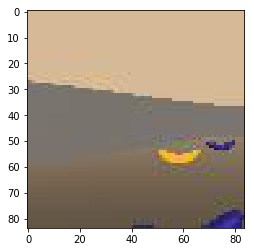

States have shape: (1, 84, 84, 3)


In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

### 3. define the DQN

dqn execute DQN algorithm according to agent mode. you can choose one from `vanilla`, `double`, `prioritized`, `dueling`, `rainbow`.

In [5]:
def dqn(agent, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.visual_observations[0]            # get the current state
        score = 0                                          # initialize the score
        for t in range(max_t):
            action = agent.act(state, eps).astype(int)     # select an action
            #np.int64 raise error AttributeError: 'numpy.int64' object has no attribute 'keys'
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.visual_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:                                       # exit loop if episode finished
                break
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=200.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

### 4. train agent

In [7]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="vanilla", visual=True)
double_scores = dqn(agent)

with open('saved_scores/vanilla_visual_scores.txt', 'wb') as f:
    pickle.dump(double_scores, f)
agent.save()

Episode 100	Average Score: 0.10
Episode 200	Average Score: -0.14
Episode 300	Average Score: -0.02
Episode 400	Average Score: 0.041
Episode 500	Average Score: -0.03
Episode 600	Average Score: 0.012
Episode 700	Average Score: -0.09
Episode 800	Average Score: 0.351
Episode 900	Average Score: -0.03
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.011
Episode 1200	Average Score: 0.041
Episode 1300	Average Score: -0.01
Episode 1400	Average Score: -0.07
Episode 1500	Average Score: -0.02
Episode 1600	Average Score: -0.09
Episode 1700	Average Score: 0.122
Episode 1800	Average Score: 0.002
Episode 1900	Average Score: 0.041
Episode 2000	Average Score: -0.09


In [8]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="double", visual=True)
double_scores = dqn(agent)

with open('saved_scores/double_visual_scores.txt', 'wb') as f:
    pickle.dump(double_scores, f)
agent.save()

RuntimeError: invalid argument 4: Index tensor must have same dimensions as input tensor at /pytorch/aten/src/THC/generic/THCTensorScatterGather.cu:16

In [ ]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="prioritized", visual=True)
prioritized_scores, prioritized_scores_window = dqn(agent)

with open('saved_scores/prioritized_visual_scores.txt', 'wb') as f:
    pickle.dump(prioritized_scores, f)
agent.save()

In [ ]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="dueling", visual=True)
dueling_scores, dueling_scores_window = dqn(agent)

with open('saved_scores/dueling_visual_scores.txt', 'wb') as f:
    pickle.dump(dueling_scores, f)
agent.save()

In [ ]:
agent = Agent(state_size=37, action_size=4, seed=0, mode="rainbow", visual=True)
rainbow_scores, rainbow_scores_window = dqn(agent)

with open('saved_scores/rainbow_visual_scores.txt', 'wb') as f:
    pickle.dump(rainbow_scores, f)
agent.save()

### 5. close the environment.

In [ ]:
env.close()

### 6. Comparison

In [ ]:
vanilla, = plt.plot(vanilla_scores, label='vanilla')
double, = plt.plot(double_scores, label='double')
prioritized, = plt.plot(prioritized_scores, label='prioritized')
dueling, = plt.plot(dueling_scores, label='dueling')
rainbow, = plt.plot(rainbow_scores, label='rainbow')
plt.legend(handles=[vanilla, double, prioritized, dueling, rainbow])
plt.show()

In [ ]:
def rolling_mean(scores):
    rolling_mean = []
    scores_window = deque(maxlen=100)
    for i in range(len(scores)):
        scores_window.append(scores[i])
        rolling_mean.append(np.mean(scores_window))
    return rolling_mean
vanila_rolling_mean = rolling_mean(vanilla_scores)
double_rolling_mean = rolling_mean(double_scores)
prioritized_rolling_mean = rolling_mean(prioritized_scores)
dueling_rolling_mean = rolling_mean(dueling_scores)
rainbow_rolling_mean = rolling_mean(rainbow_scores)

In [ ]:
vanilla, = plt.plot(vanila_rolling_mean, label='vanilla')
double, = plt.plot(double_rolling_mean, label='double')
prioritized, = plt.plot(prioritized_rolling_mean, label='prioritized')
dueling, = plt.plot(dueling_rolling_mean, label='dueling')
rainbow, = plt.plot(rainbow_rolling_mean, label='rainbow')
plt.legend(handles=[vanilla, double, prioritized, dueling, rainbow])
plt.show()